In [1]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import statsmodels.api as sm


In [2]:
#Models for algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#regression models
from sklearn.linear_model import LinearRegression,Ridge,Lasso, RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
#model assitance 
#from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder



#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno



# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)


In [3]:
# Center all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");


In [4]:
df=pd.read_csv('diamonds.csv')
diamonds=df.copy()

In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#Features of Data
*Carat : Carat weight of the Diamond.
*Cut : Describe cut quality of the diamond.
*Quality in increasing order Fair, Good, Very Good, Premium, Ideal .
*Color : Color of the Diamond.
*With D being the best and J the worst.
*Clarity : Diamond Clarity refers to the absence of the Inclusions and Blemishes.
(In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
*Depth : The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.
*Table : The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
*Price : the Price of the Diamond.
*X : Length of the Diamond in mm.
*Y : Width of the Diamond in mm.
    

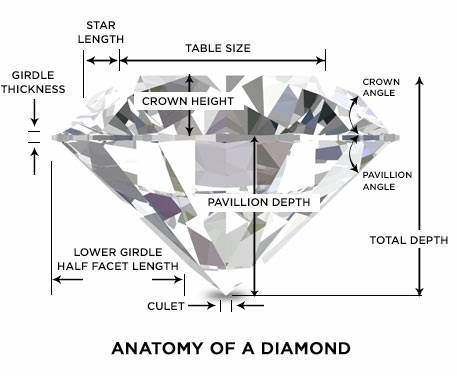

In [6]:
#Eliminate column 
df.drop(['Unnamed: 0'] , axis=1 , inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
#Data Size
df.shape

(53940, 10)

In [8]:
#Null data and synopsis of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
#confirm null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<AxesSubplot:>

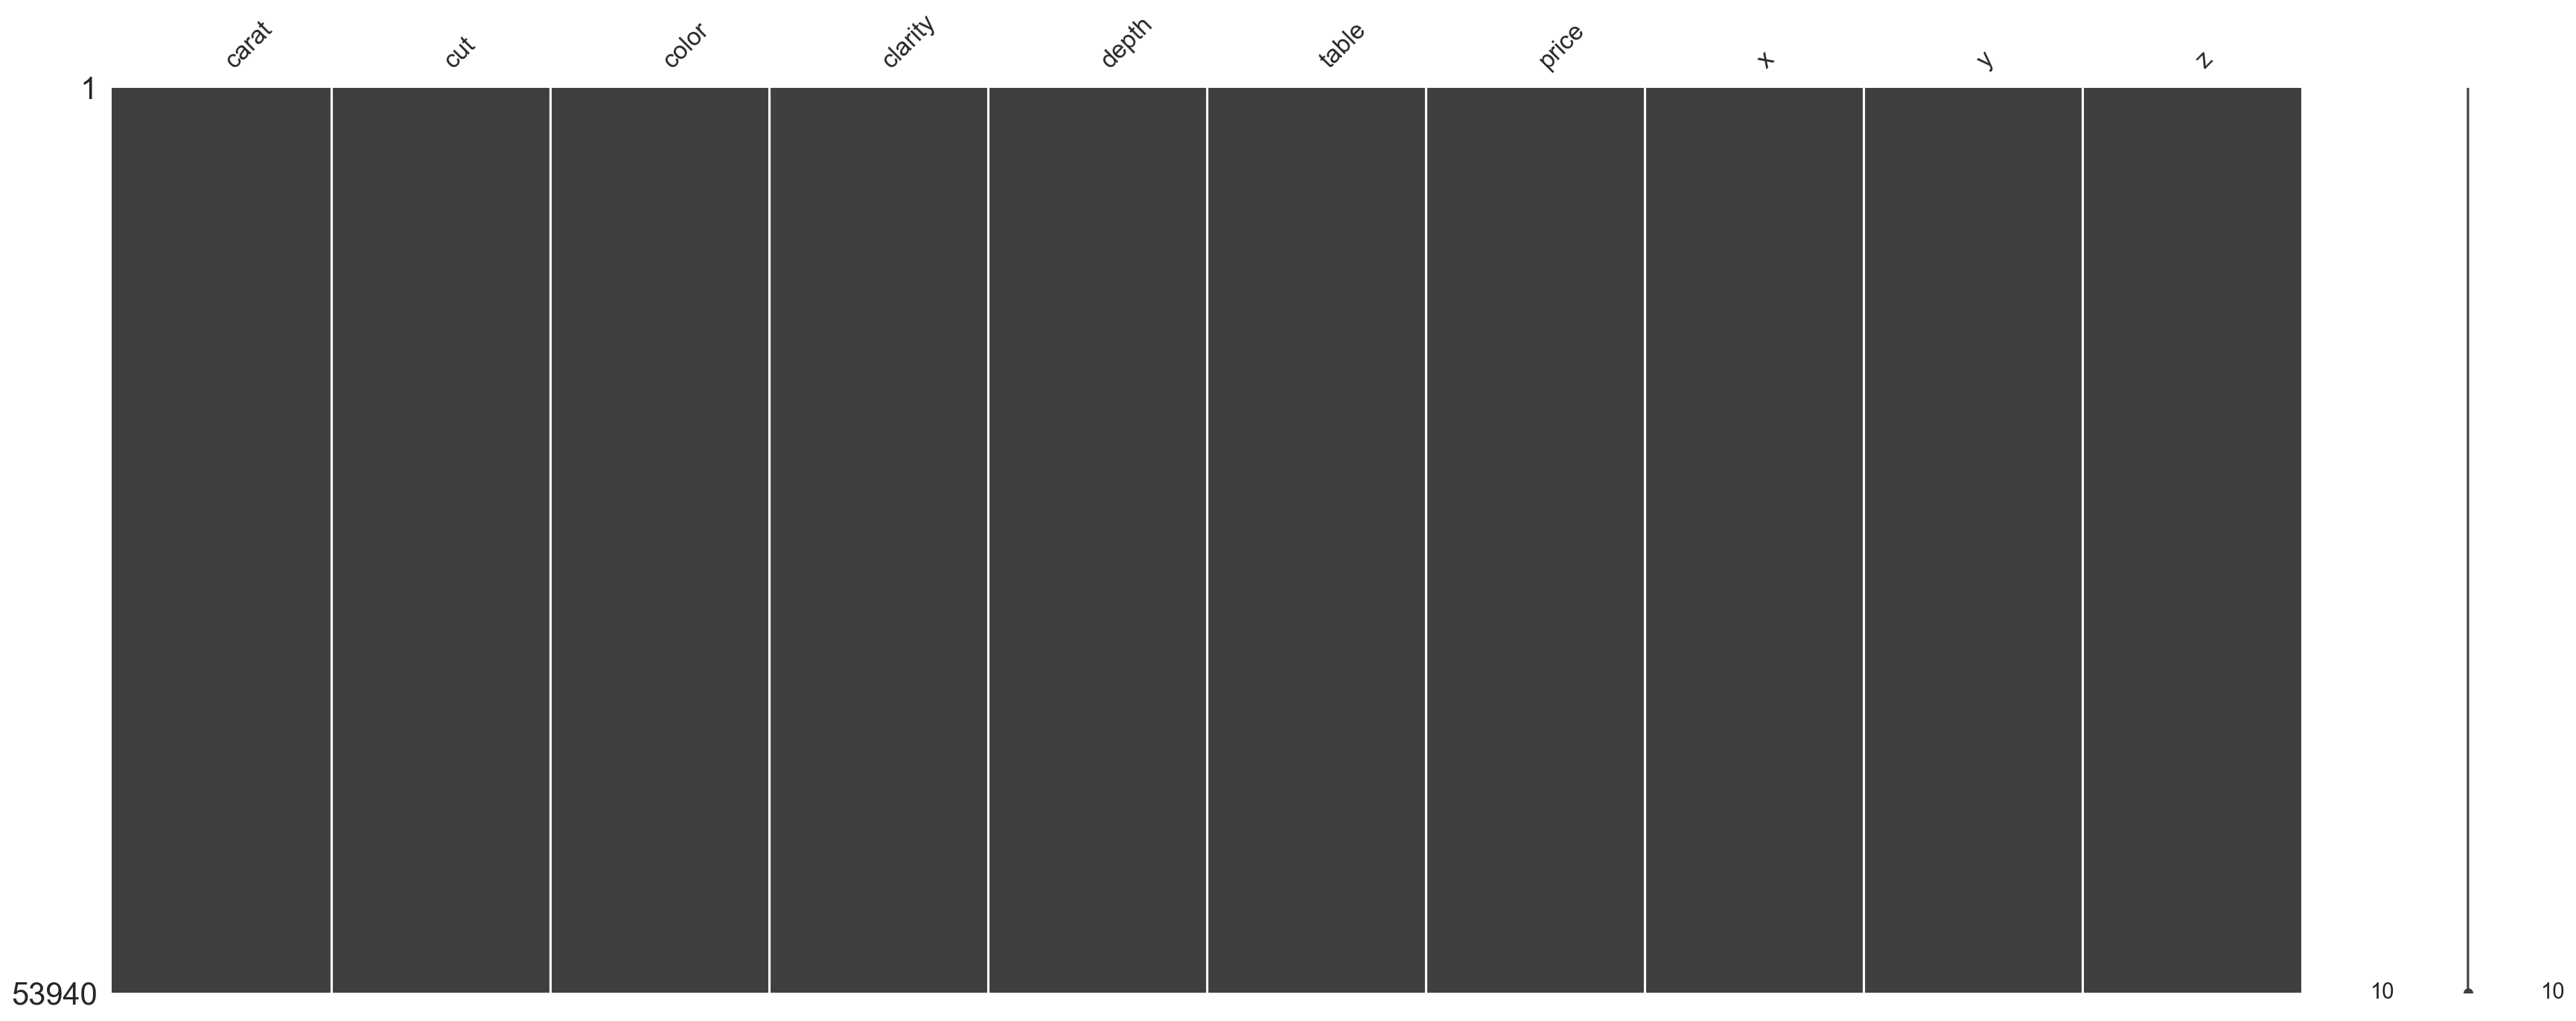

In [10]:
msno.matrix(df)#visulaize missing values

In [11]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
df.loc[(df['x']==0) | (df['y']==0) |(df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
...,...,...,...,...,...,...,...,...,...,...
27503,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
27739,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0


In [13]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

20

In [14]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [15]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


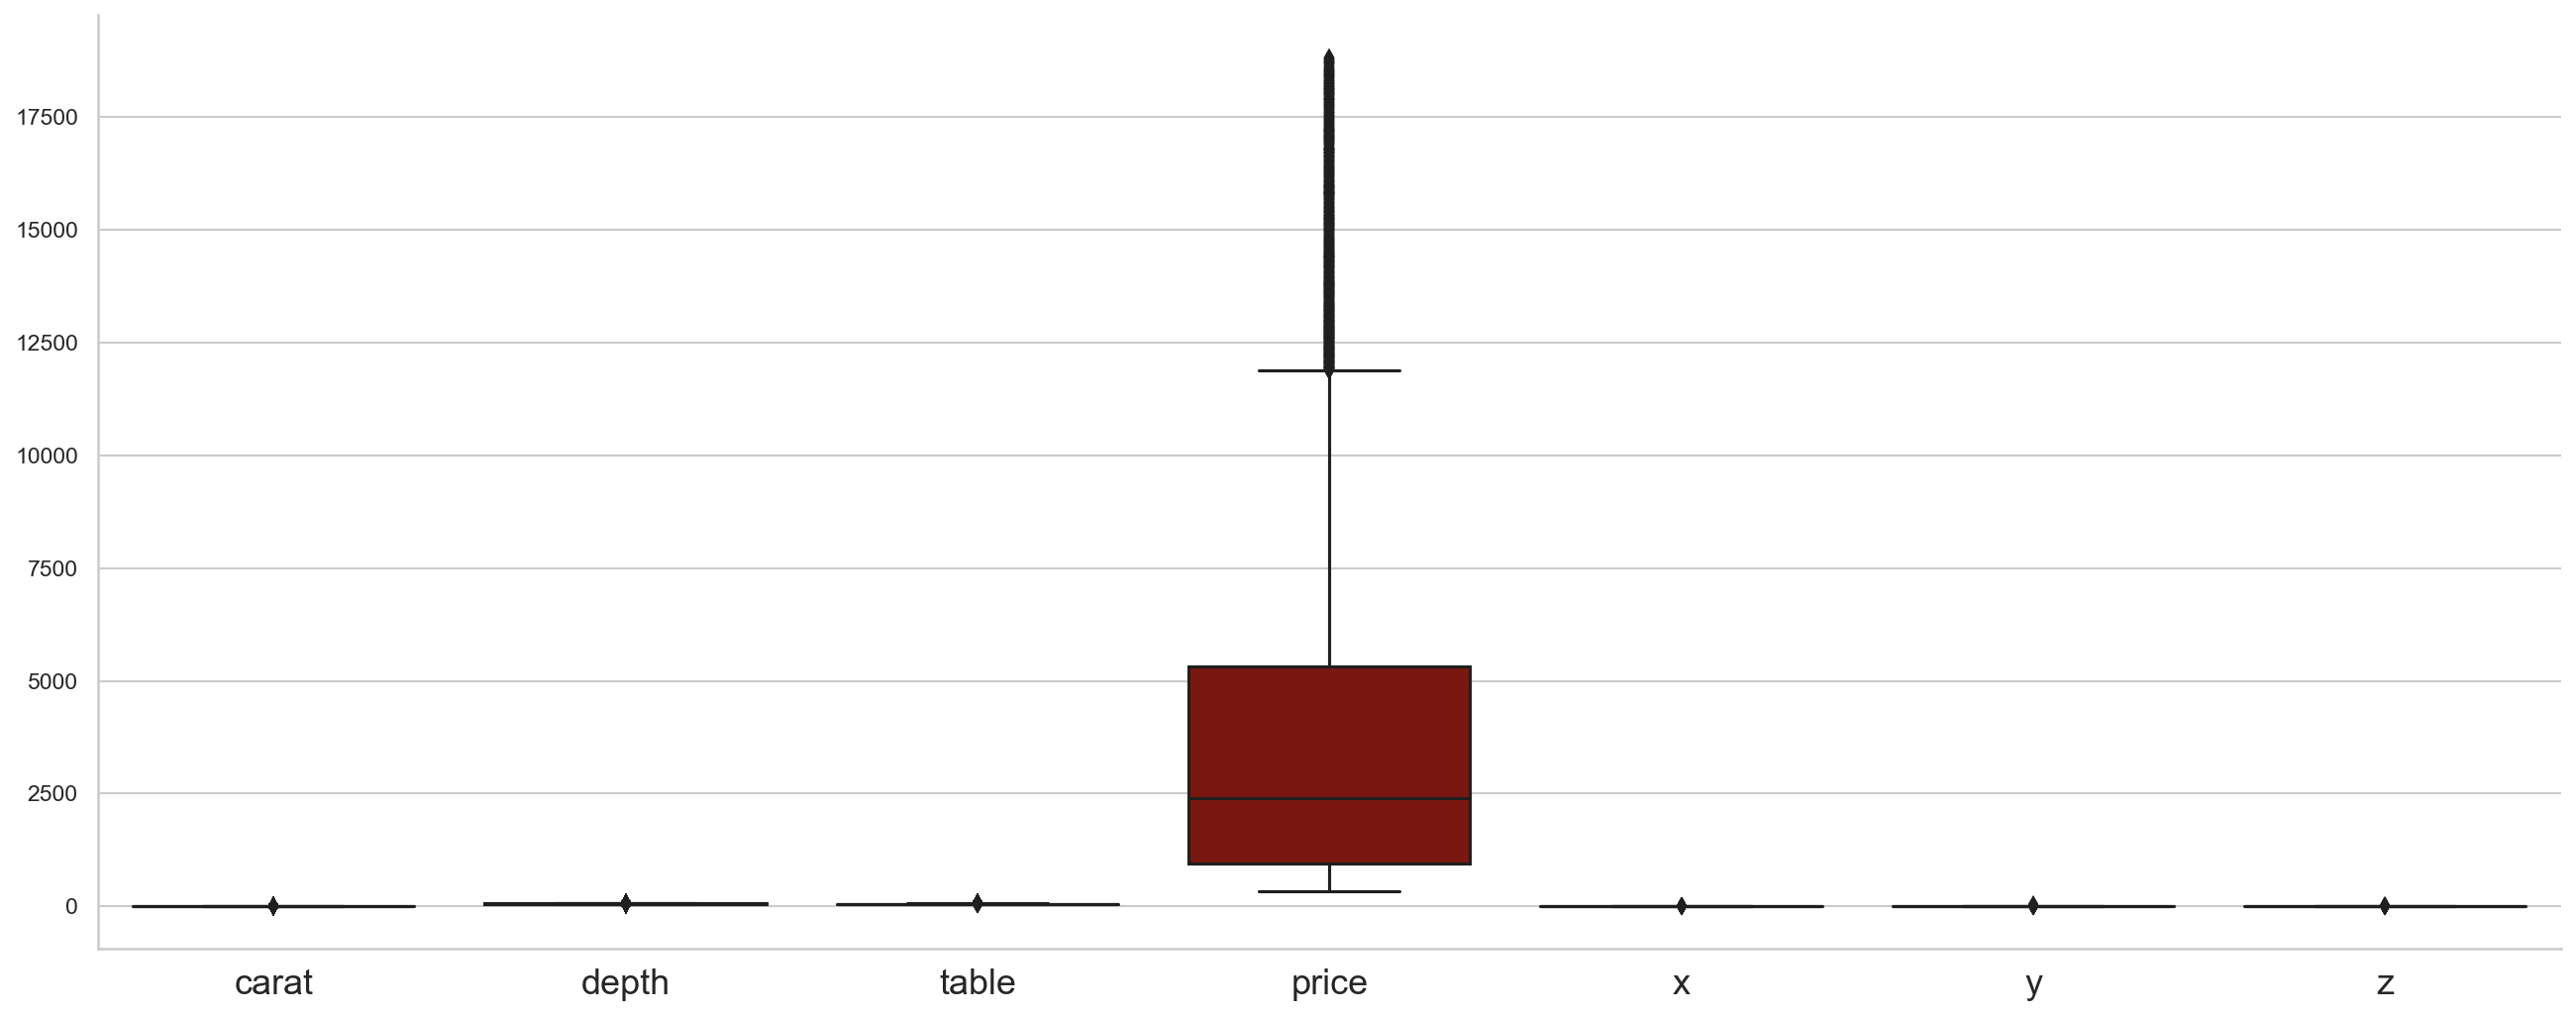

In [16]:
#View numerical differance with box plot and Data Symmetry
sns.factorplot(data=df , kind='box' , size=7, aspect=2.5)


<AxesSubplot:>

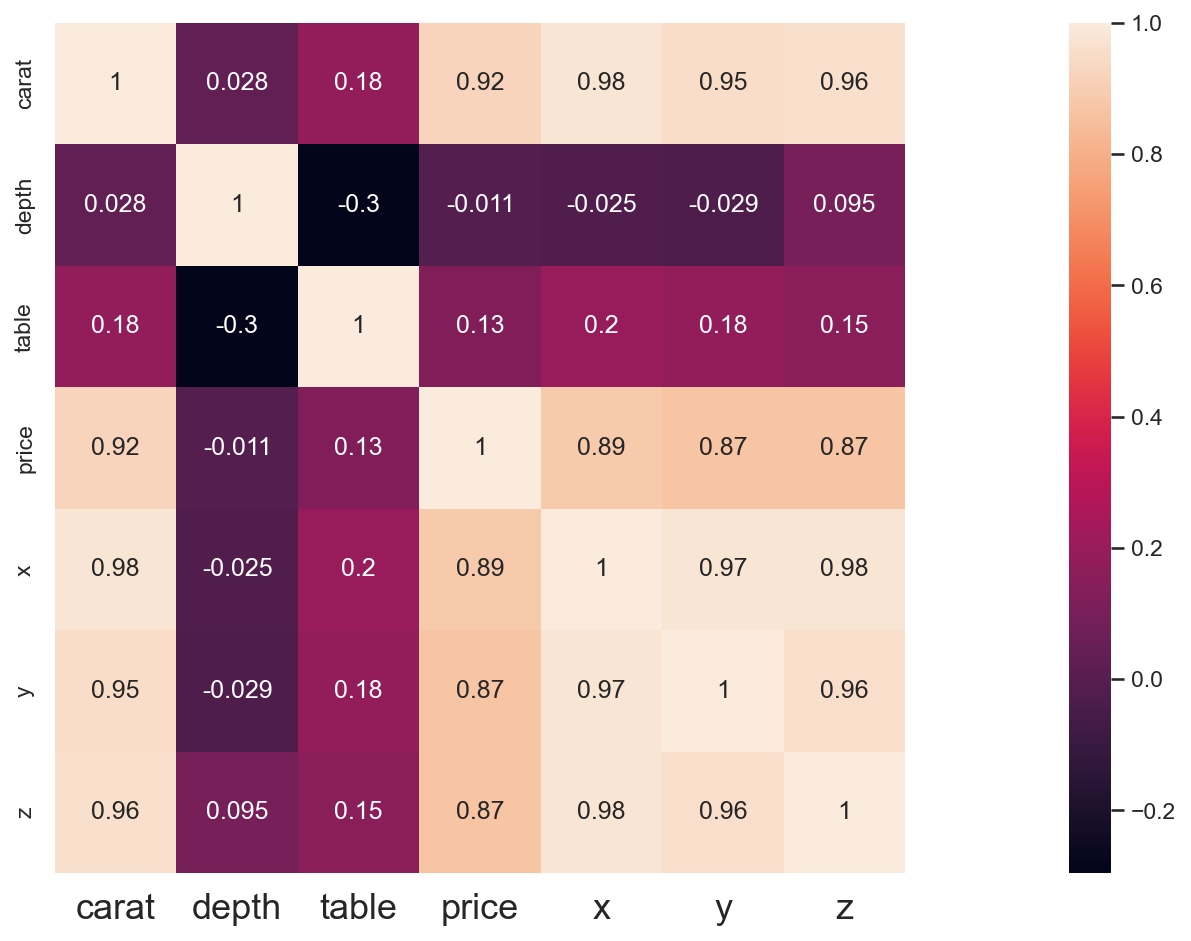

In [17]:
#Use Coorelation Heat map for another visual perspective
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

1. Depth is inversely related to Price.

This is because if a Diamond's Depth percentage is too large or small the Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light.
2. The Price of the Diamond is highly correlated to Carat, and its Dimensions.

3. The Weight (Carat) of a diamond has the most significant impact on its Price.

Since, the larger a stone is, the Rarer it is, one 2 carat diamond will be more 'Expensive' than the total cost of two 1 Carat Diamonds of the same Quality.
4. The Length(x) , Width(y) and Height(z) seems to be higly related to Price and even each other.

5. Self Relation ie. of a feature to itself is 1 as expected.

6. Some other Inferences can also be drawn.

3.1) Carat
Carat refers to the Weight of the Stone, not the Size.
The Weight of a Diamond has the most significant Impact on its Price.
Since the larger a Stone is, the Rarer it is, one 2 Carat Diamond will be more Expensive than the Total cost of two 1 Carat Diamonds of the Same Quality.
The carat of a Diamond is often very Important to People when shopping But it is a Mistake to Sacrifice too much quality for sheer size.


<AxesSubplot:xlabel='carat', ylabel='Density'>

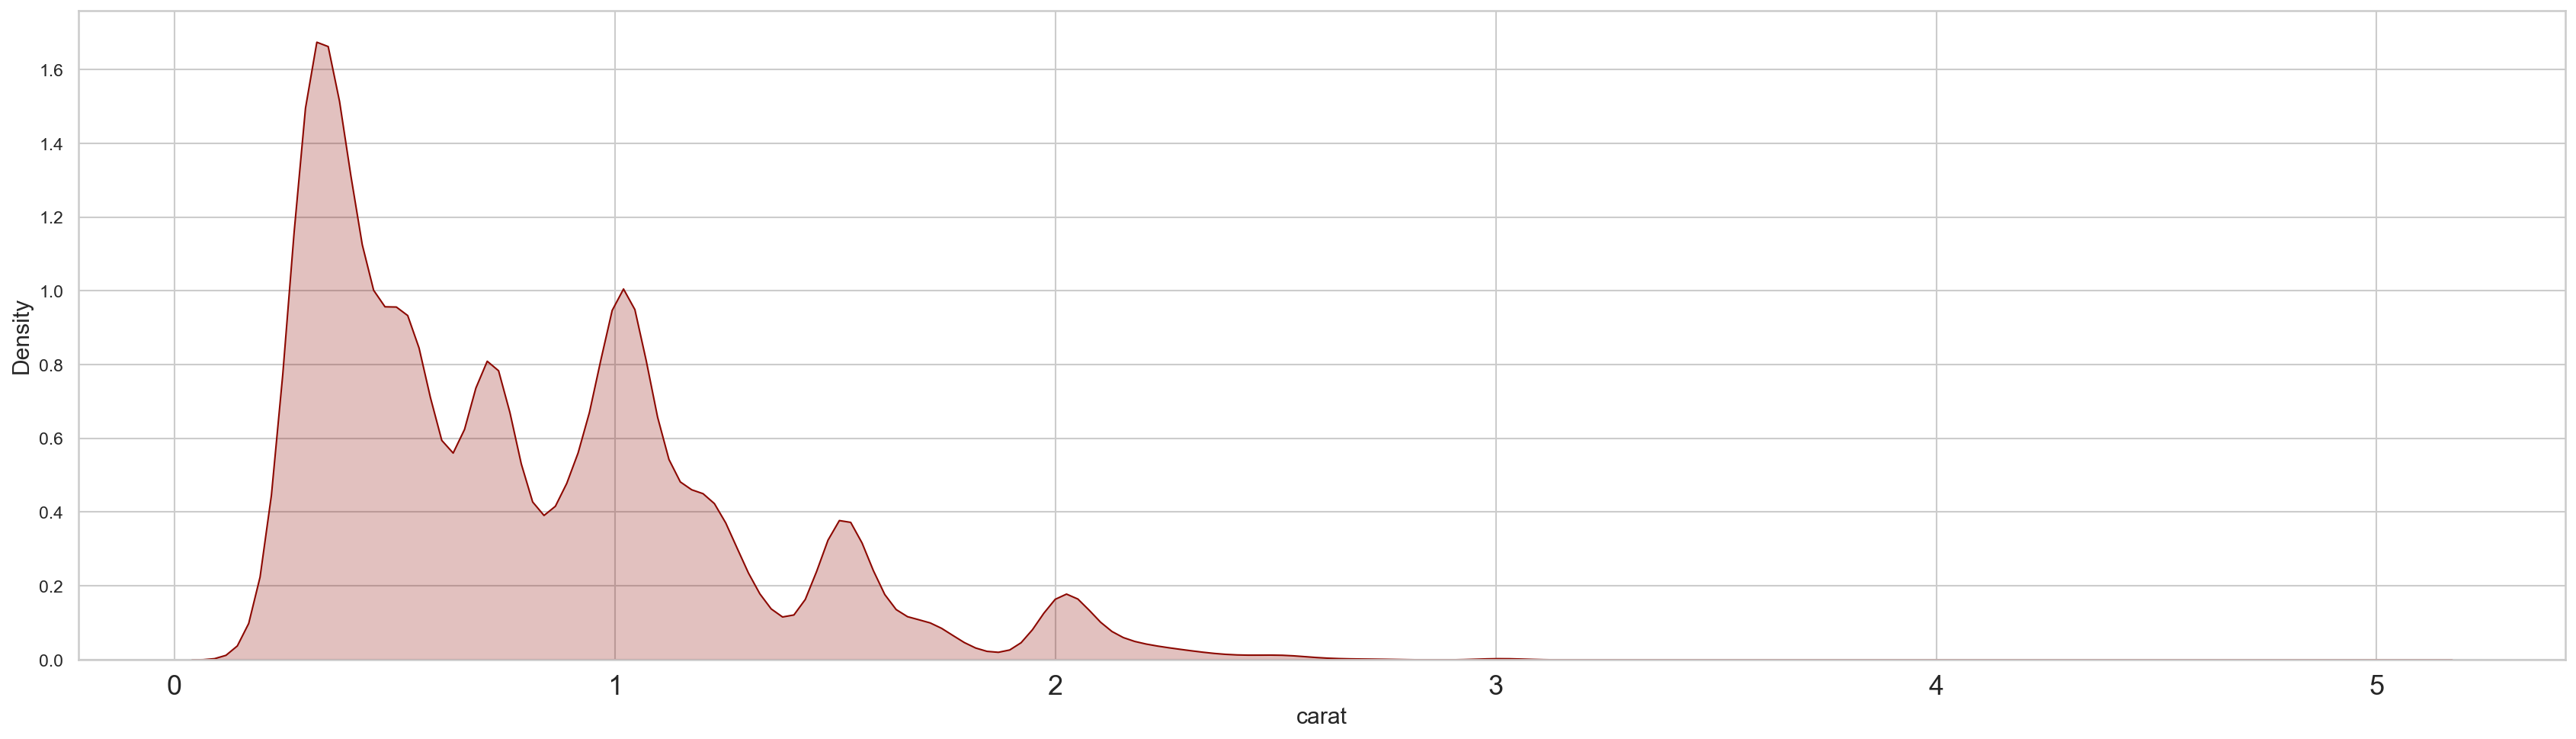

In [18]:
sns.kdeplot(df['carat'], shade=True , color='r')

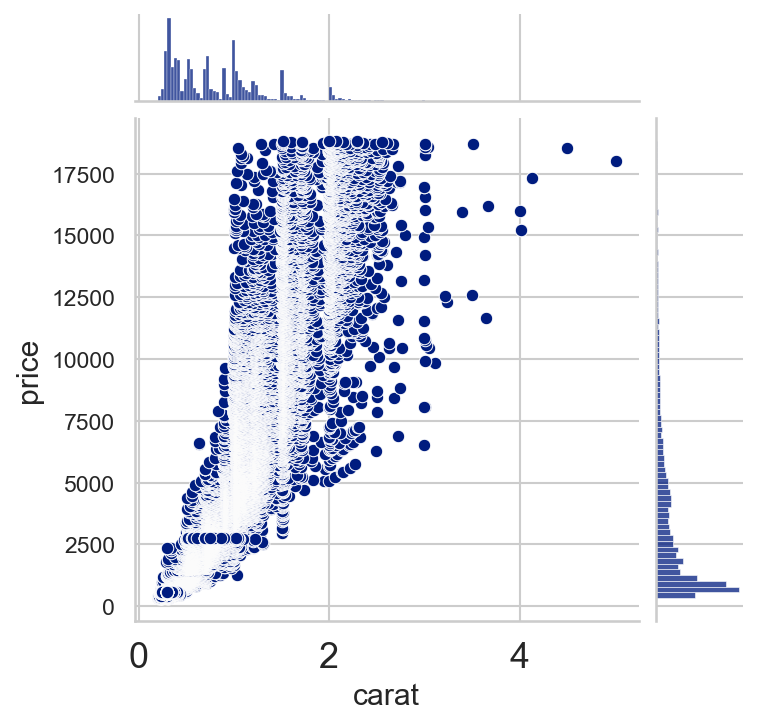

In [19]:
sns.jointplot(x='carat' , y='price' , data=df , size=5)

3.2) Cut
Although the Carat Weight of a Diamond has the Strongest Effect on Prices, the Cut can still Drastically Increase or Decrease its value.
With a Higher Cut Quality, the Diamond’s Cost per Carat Increases.
This is because there is a Higher Wastage of the Rough Stone as more Material needs to be Removed in order to achieve better Proportions and Symmetry.


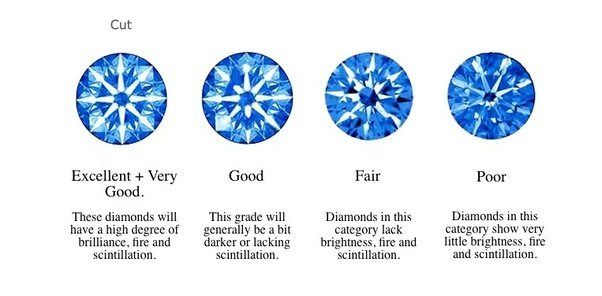

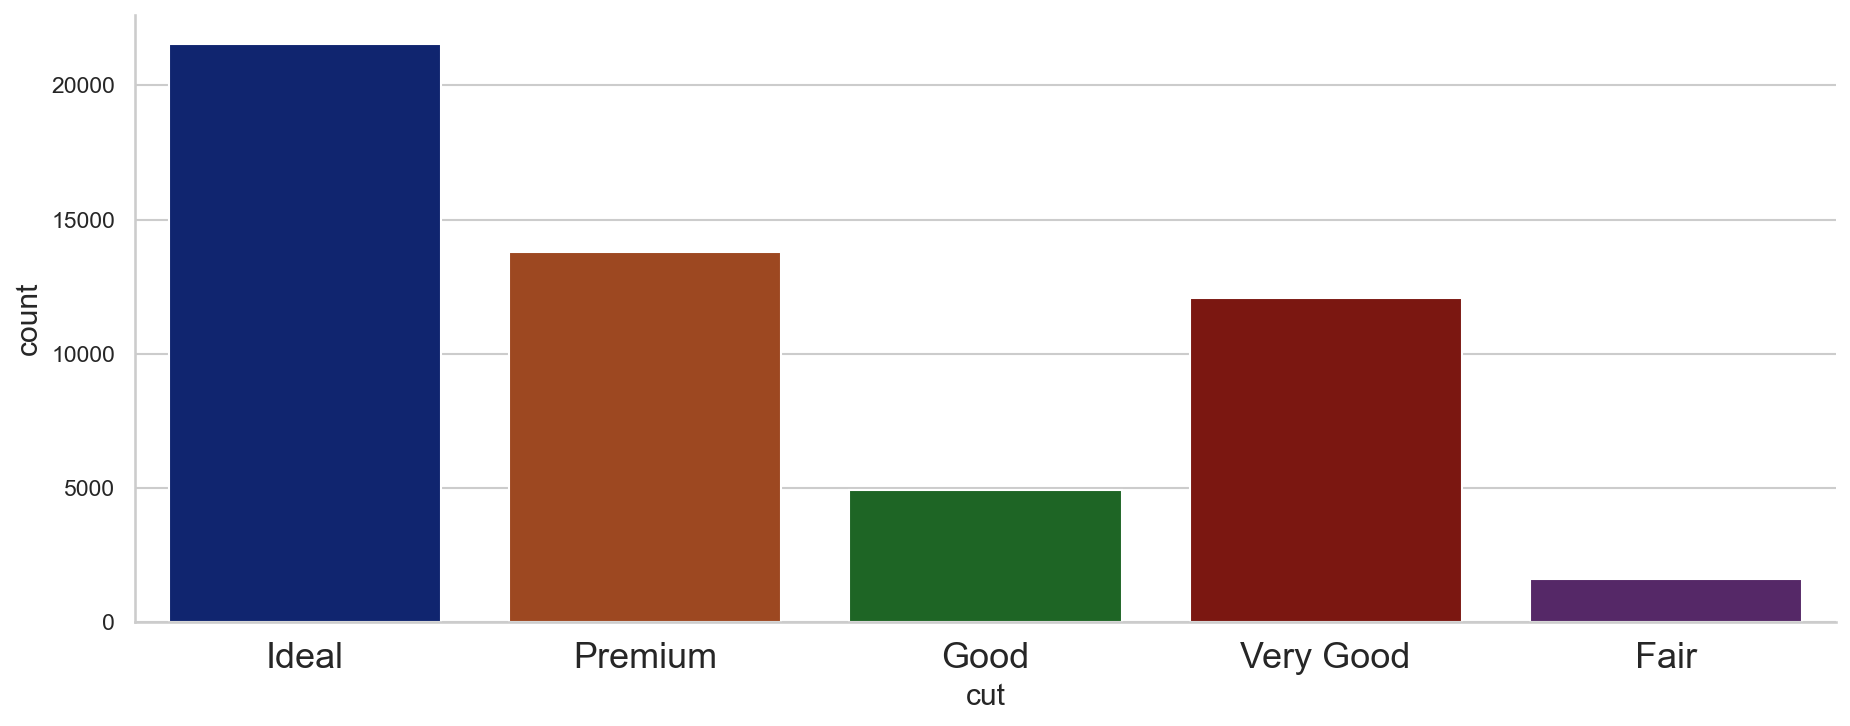

In [20]:
sns.factorplot(x='cut', data=df , kind='count',aspect=2.5 )

# Cut vs Prices

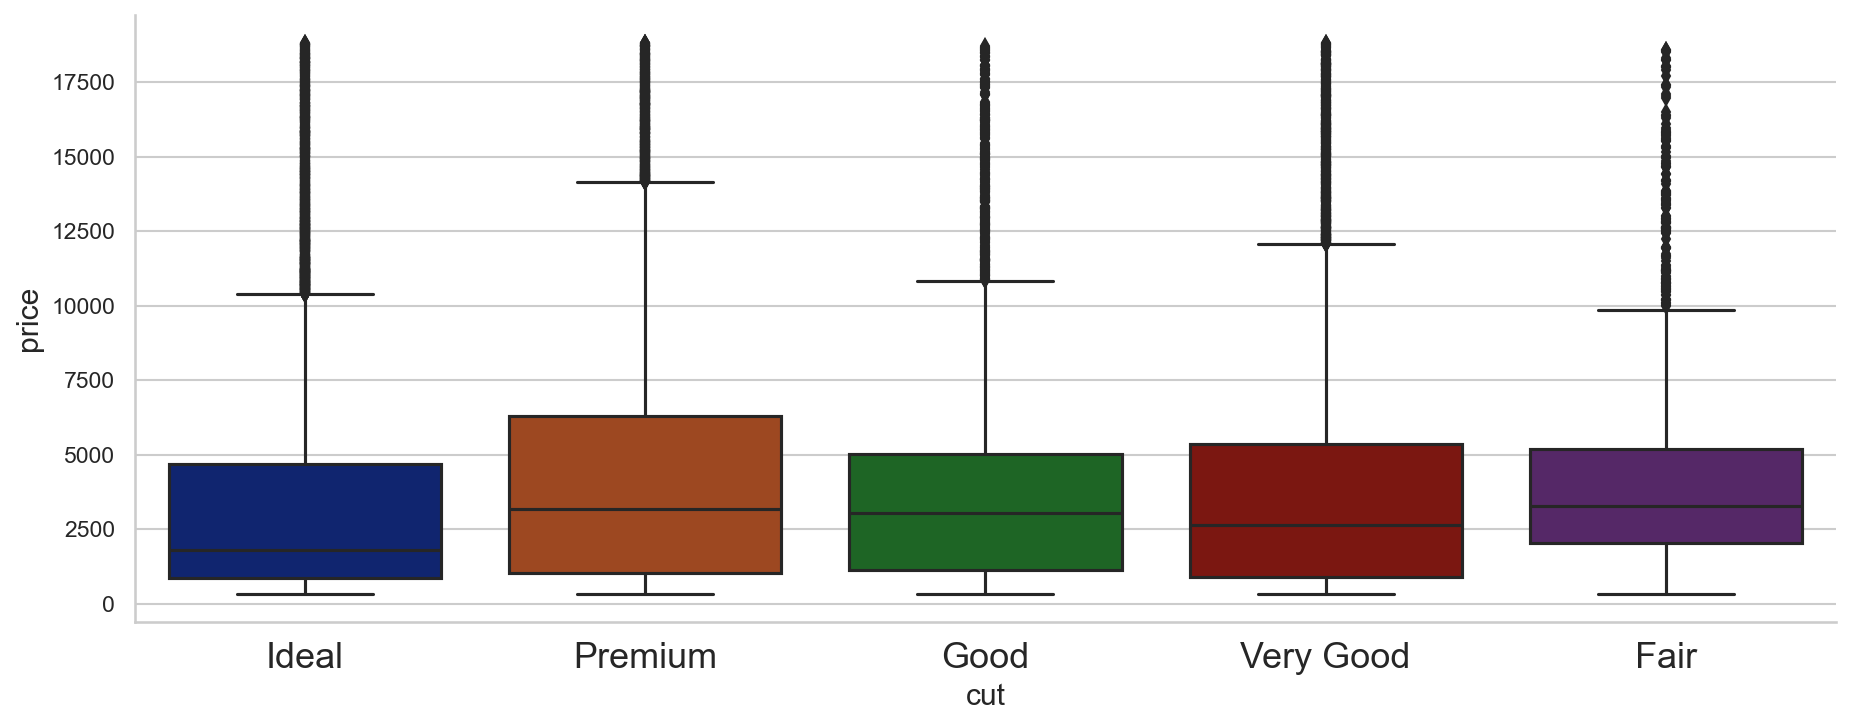

In [21]:
sns.factorplot(x='cut', y='price', data=df, kind='box' ,aspect=2.5 )

# Understanding Box Plot :

# The bottom line indicates the min value of Age.
# The upper line indicates the max value.
# The middle line of the box is the median or the 50% percentile.
# The side lines of the box are the 25 and 75 percentiles respectively

Premium Cut on Diamonds as we can see are the most Expensive, followed by Excellent / Very Good Cut.

# Color
The Color of a Diamond refers to the Tone and Saturation of Color, or the Depth of Color in a Diamond.
The Color of a Diamond can Range from Colorless to a Yellow or a Faint Brownish Colored hue.
Colorless Diamonds are Rarer and more Valuable because they appear Whiter and Brighter.

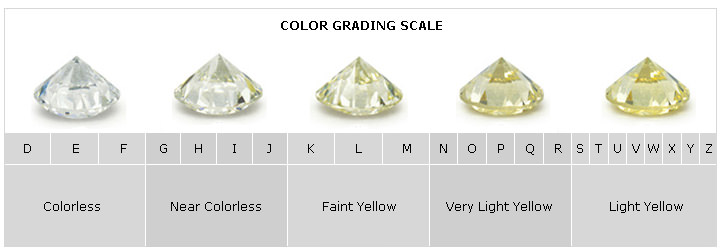


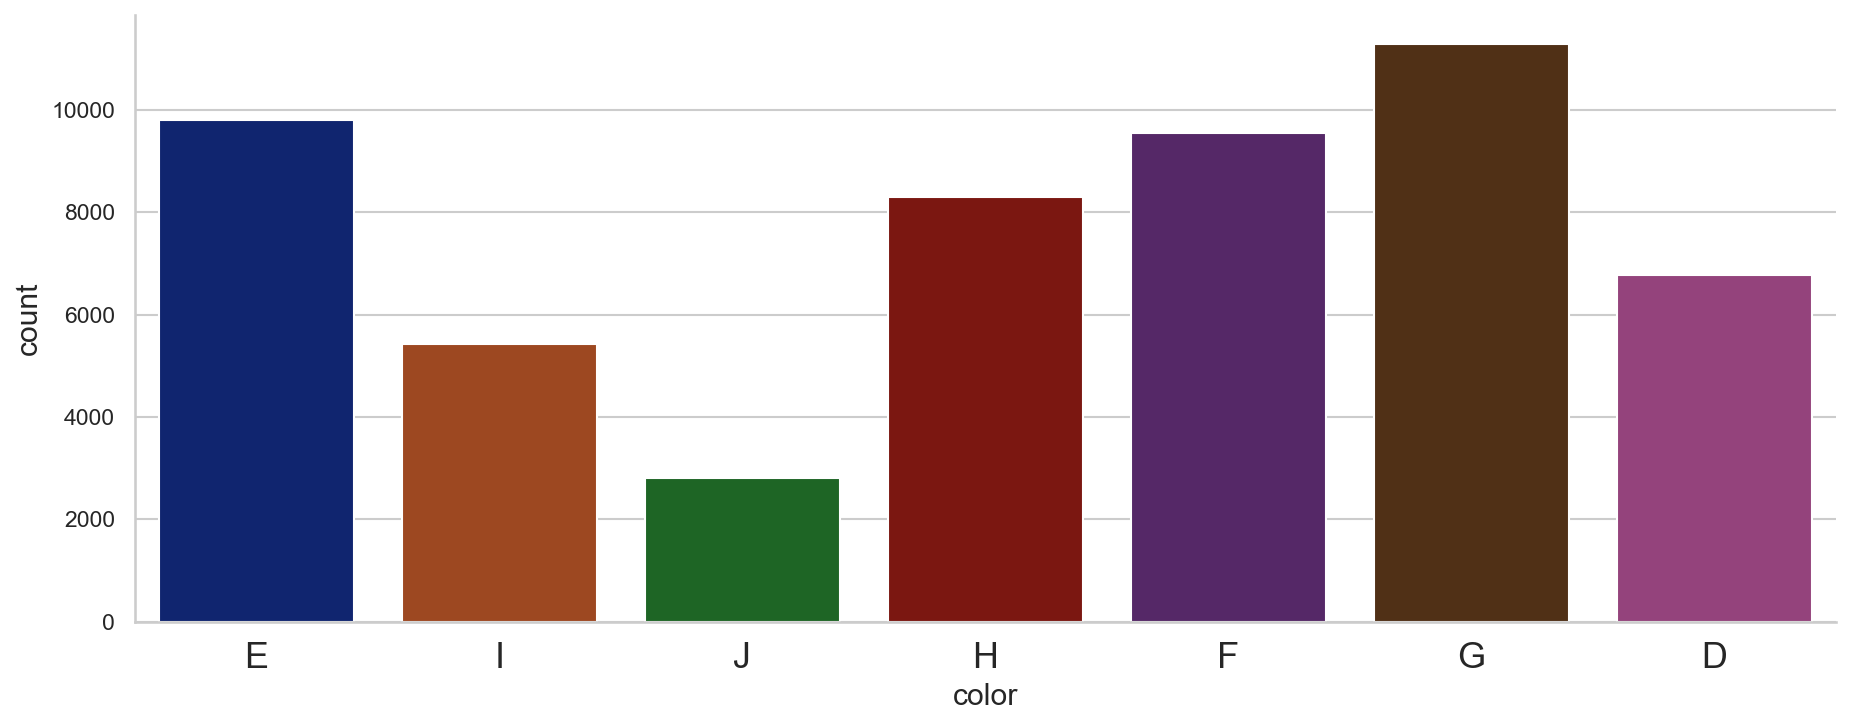

In [22]:
sns.factorplot(x='color', data=df , kind='count',aspect=2.5 )

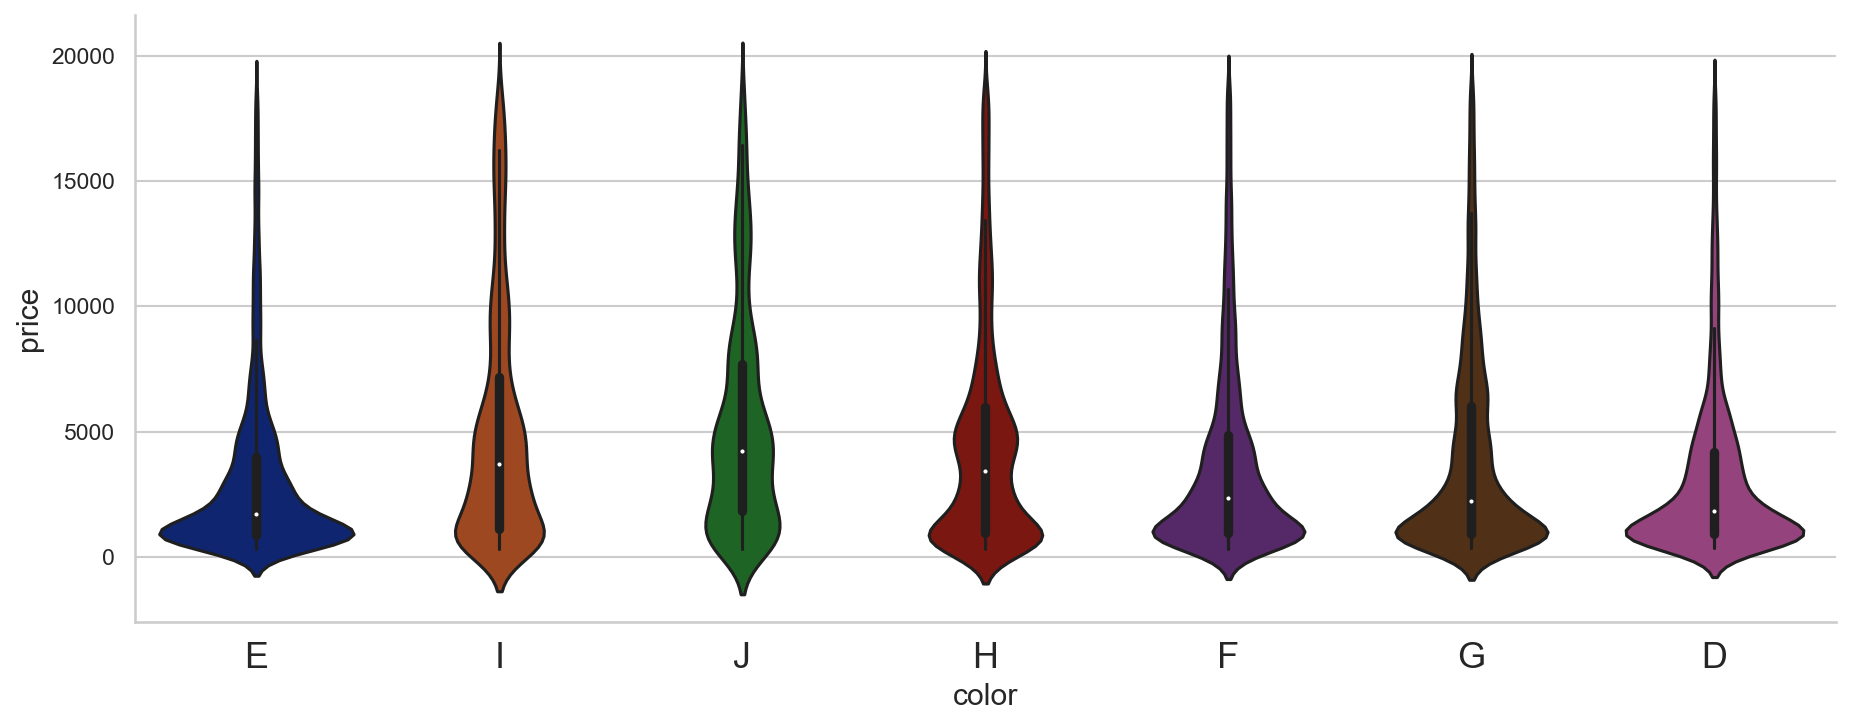

In [23]:
sns.factorplot(x='color', y='price' , data=df , kind='violin', aspect=2.5)


# Clarity


Diamond Clarity refers to the absence of the Inclusions and Blemishes.
An Inclusion is an Imperfection located within a Diamond. Inclusions can be Cracks or even Small Minerals or Crystals that have formed inside the Diamond.
Blemishing is a result of utting and polishing process than the environmental conditions in which the diamond was formed. It includes scratches, extra facets etc.

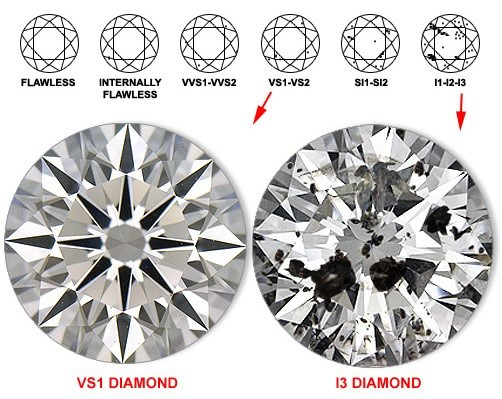

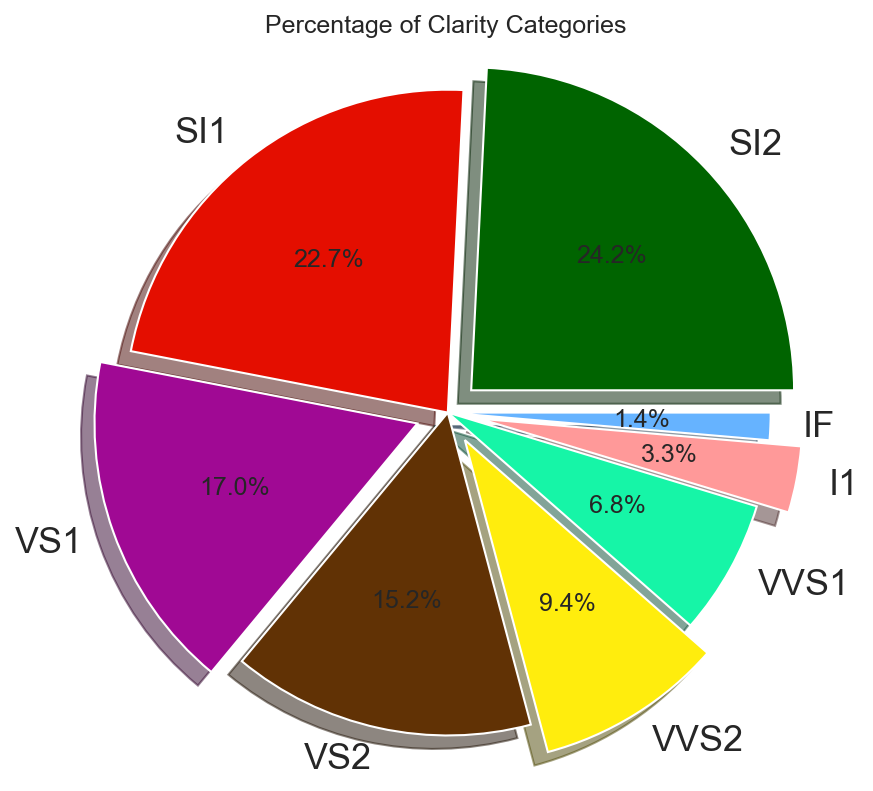

In [24]:
labels = df.clarity.unique().tolist()
sizes = df.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

<AxesSubplot:xlabel='clarity', ylabel='price'>

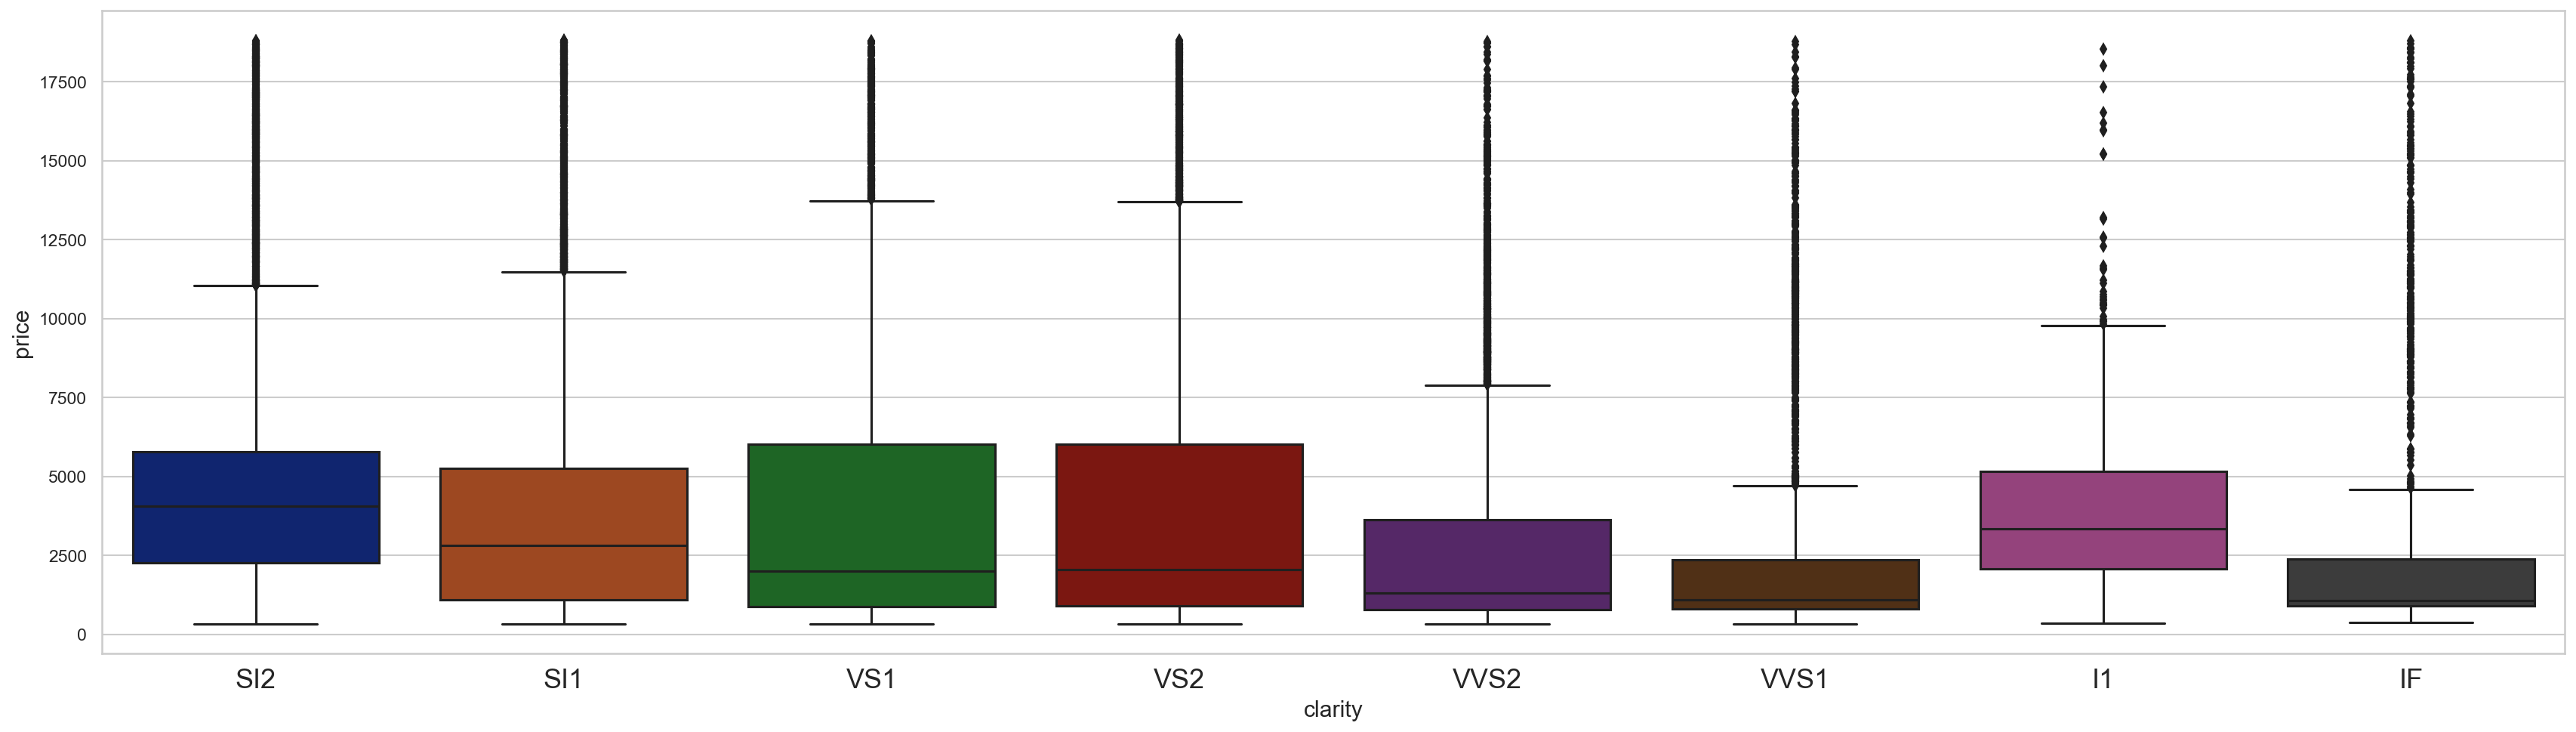

In [25]:
sns.boxplot(x='clarity', y='price', data=df )

# Depth

The Depth of a Diamond is its Height (in millimeters) measured from the Culet to the Table.
If a Diamond's Depth Percentage is too large or small the Diamond will become Dark in appearance because it will no longer return an Attractive amount of light.

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 4.0000e+00, 1.1000e+01, 4.3000e+01, 2.1900e+02,
        1.4240e+03, 5.0730e+03, 1.8242e+04, 2.2649e+04, 5.0330e+03,
        8.5100e+02, 2.3400e+02, 8.7000e+01, 2.7000e+01, 1.1000e+01,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([43.  , 44.44, 45.88, 47.32, 48.76, 50.2 , 51.64, 53.08, 54.52,
        55.96, 57.4 , 58.84, 60.28, 61.72, 63.16, 64.6 , 66.04, 67.48,
        68.92, 70.36, 71.8 , 73.24, 74.68, 76.12, 77.56, 79.  ]),
 <BarContainer object of 25 artists>)

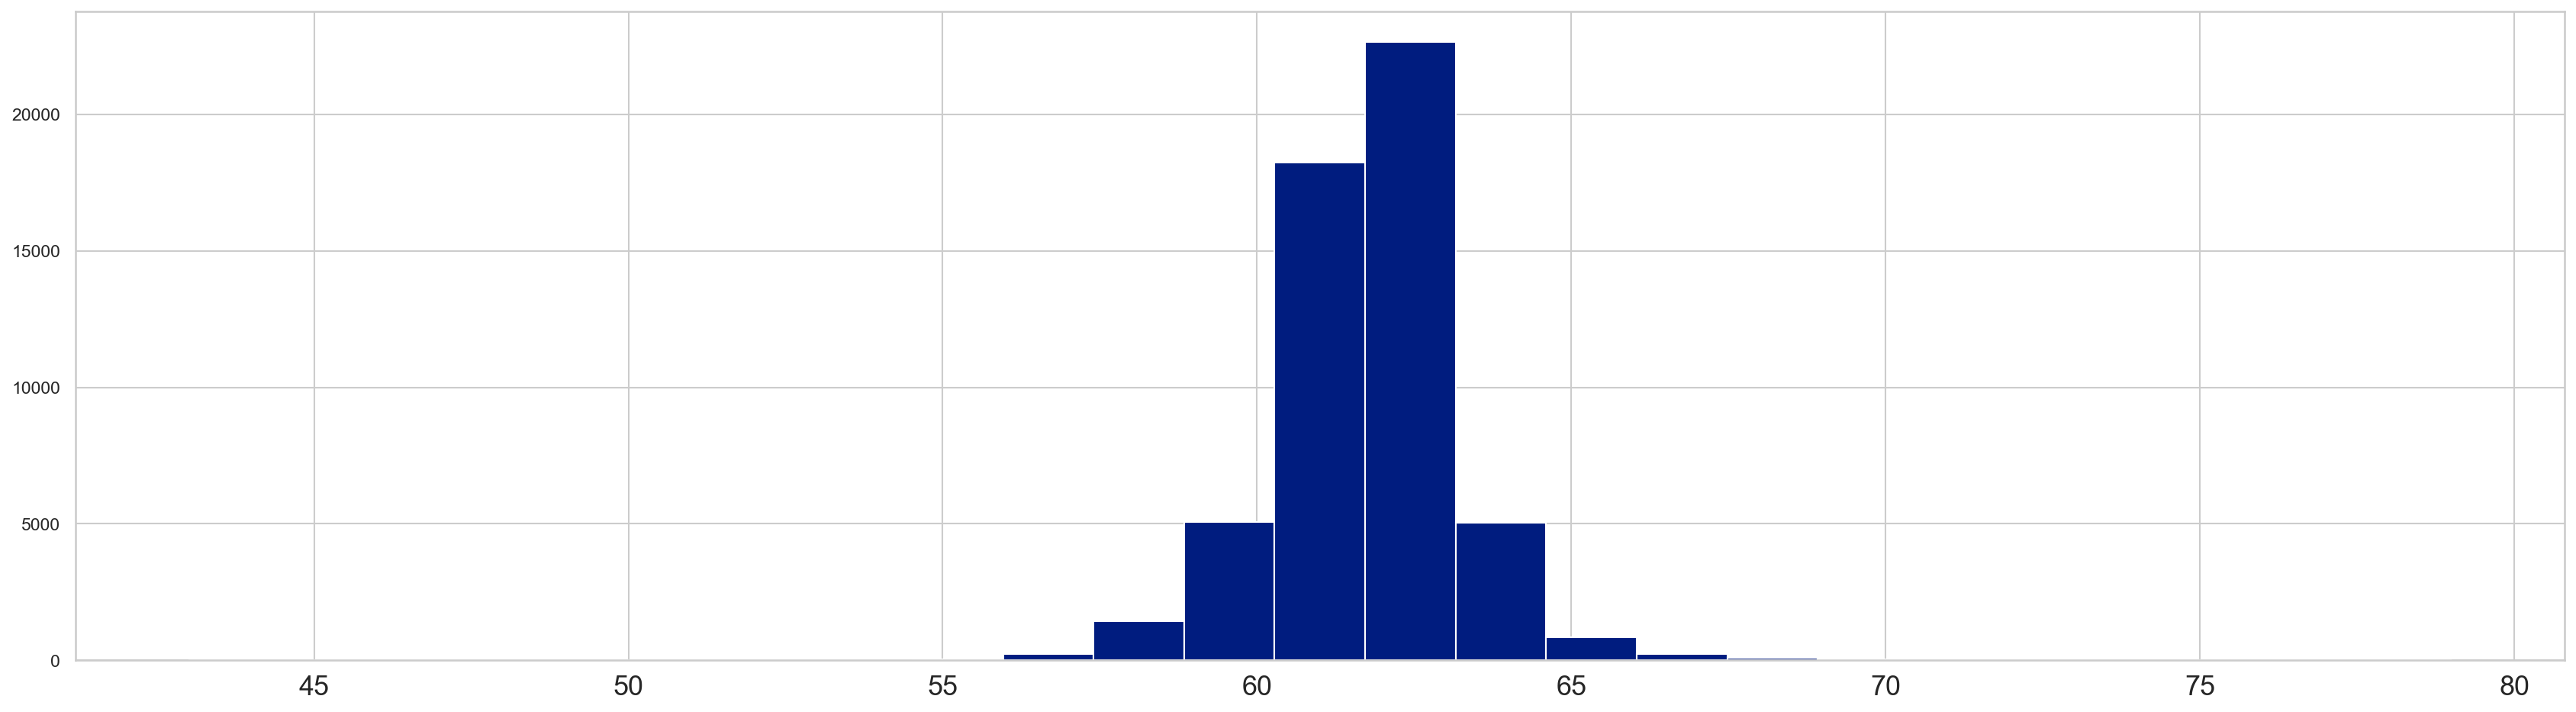

In [26]:
plt.hist('depth' , data=df , bins=25)

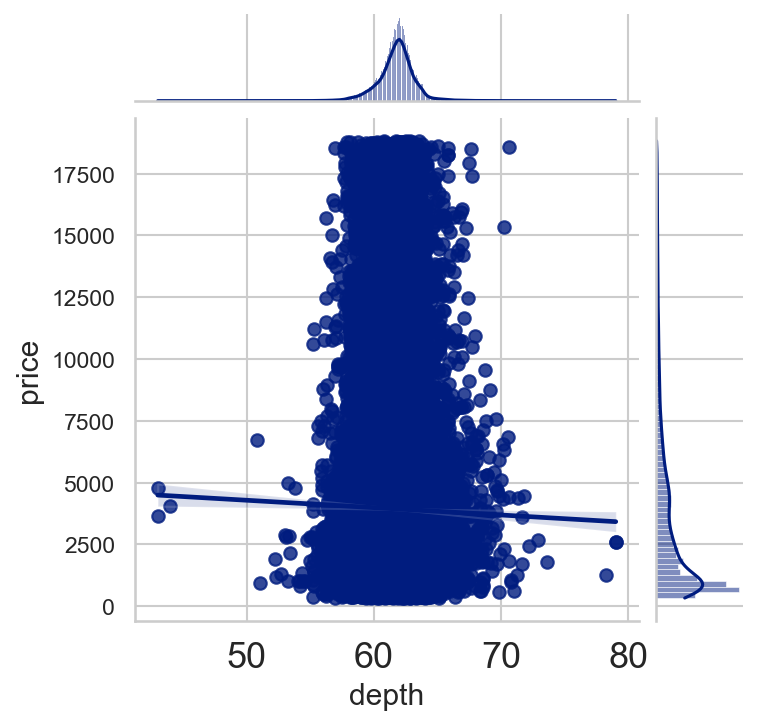

In [27]:
sns.jointplot(x='depth', y='price' , data=df , kind='reg', size=5)

# Table

Table is the Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
If the Table (Upper Flat Facet) is too Large then light will not play off of any of the Crown's angles or facets and will not create the Sparkly Rainbow Colors.
If it is too Small then the light will get Trapped and that Attention grabbing shaft of light will never come out but will “leak” from other places in the Diamond.

<AxesSubplot:xlabel='table', ylabel='Density'>

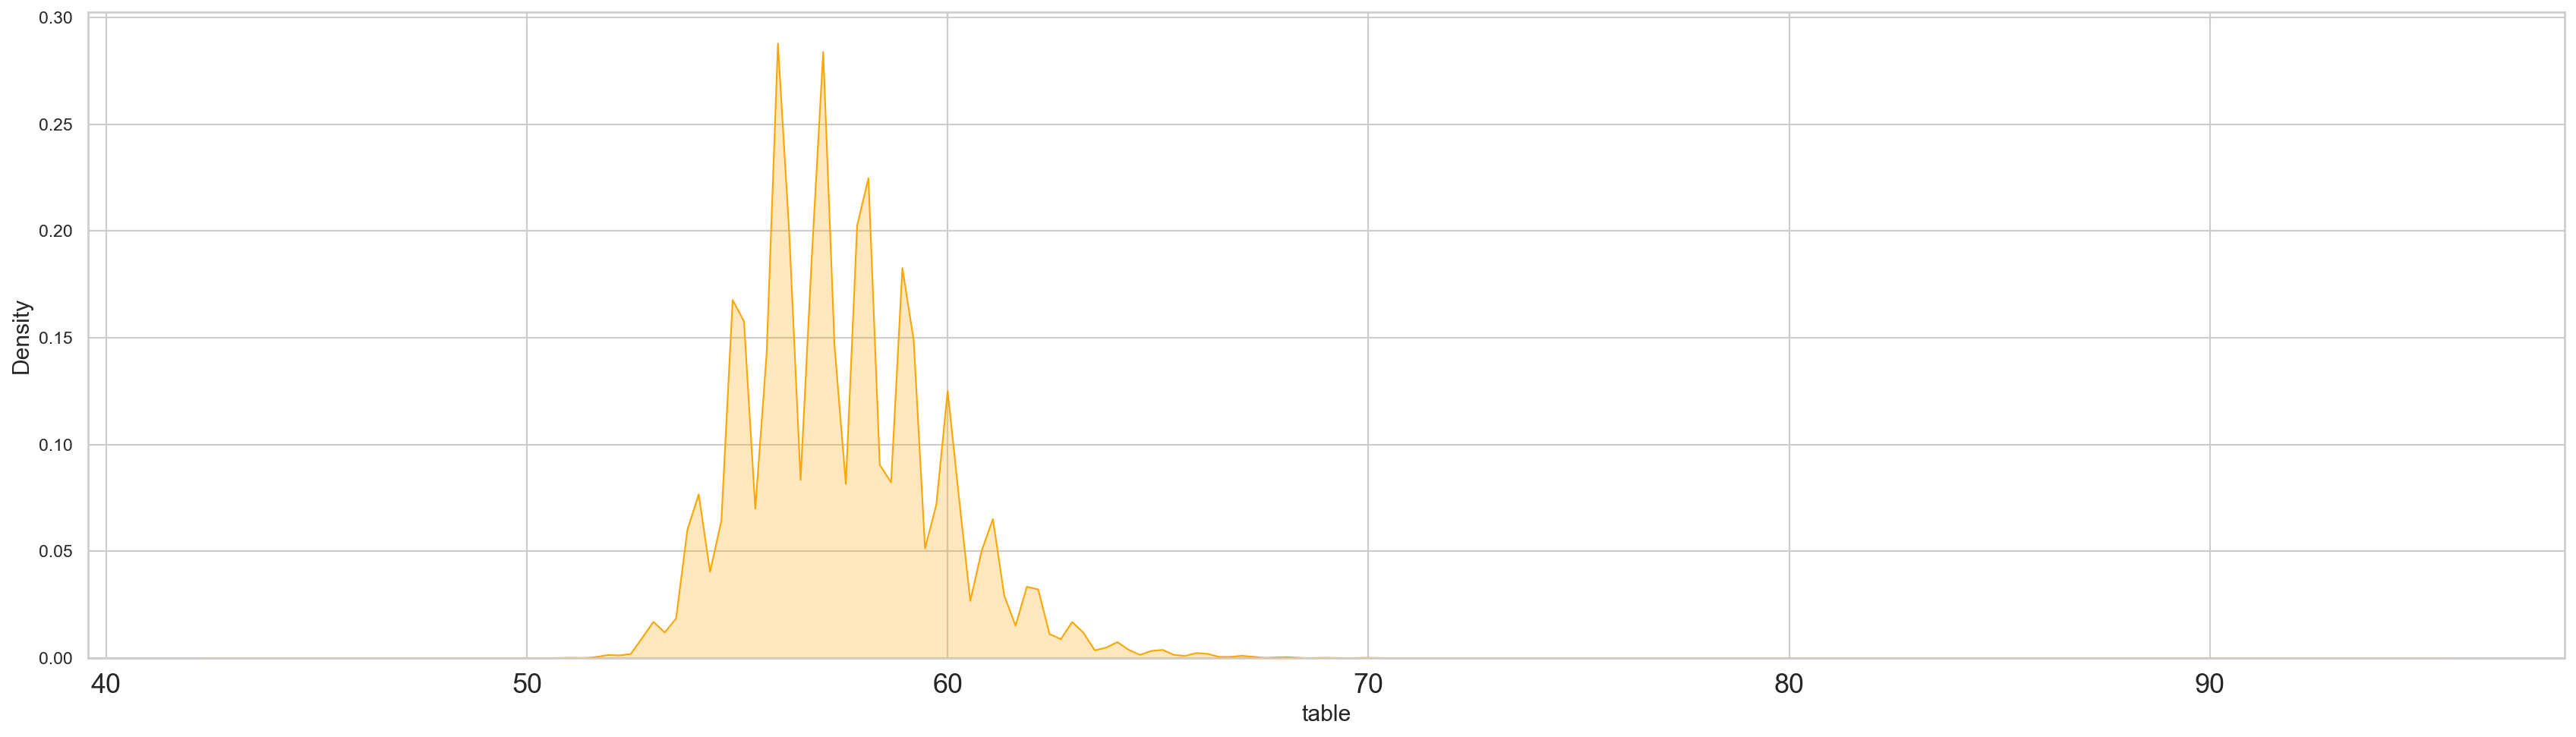

In [28]:
sns.kdeplot(df['table'] ,shade=True , color='orange')

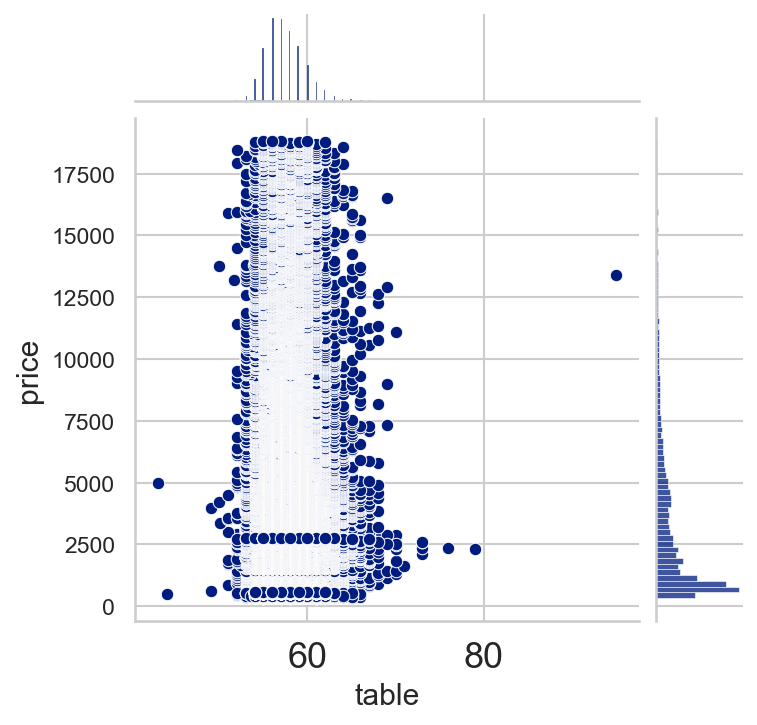

In [29]:
sns.jointplot(x='table', y='price', data=df , size=5)

# Dimensions


As the Dimensions increases, Obviously the Prices Rises as more and more Natural Resources are Utilised.

(2.0, 10.0)

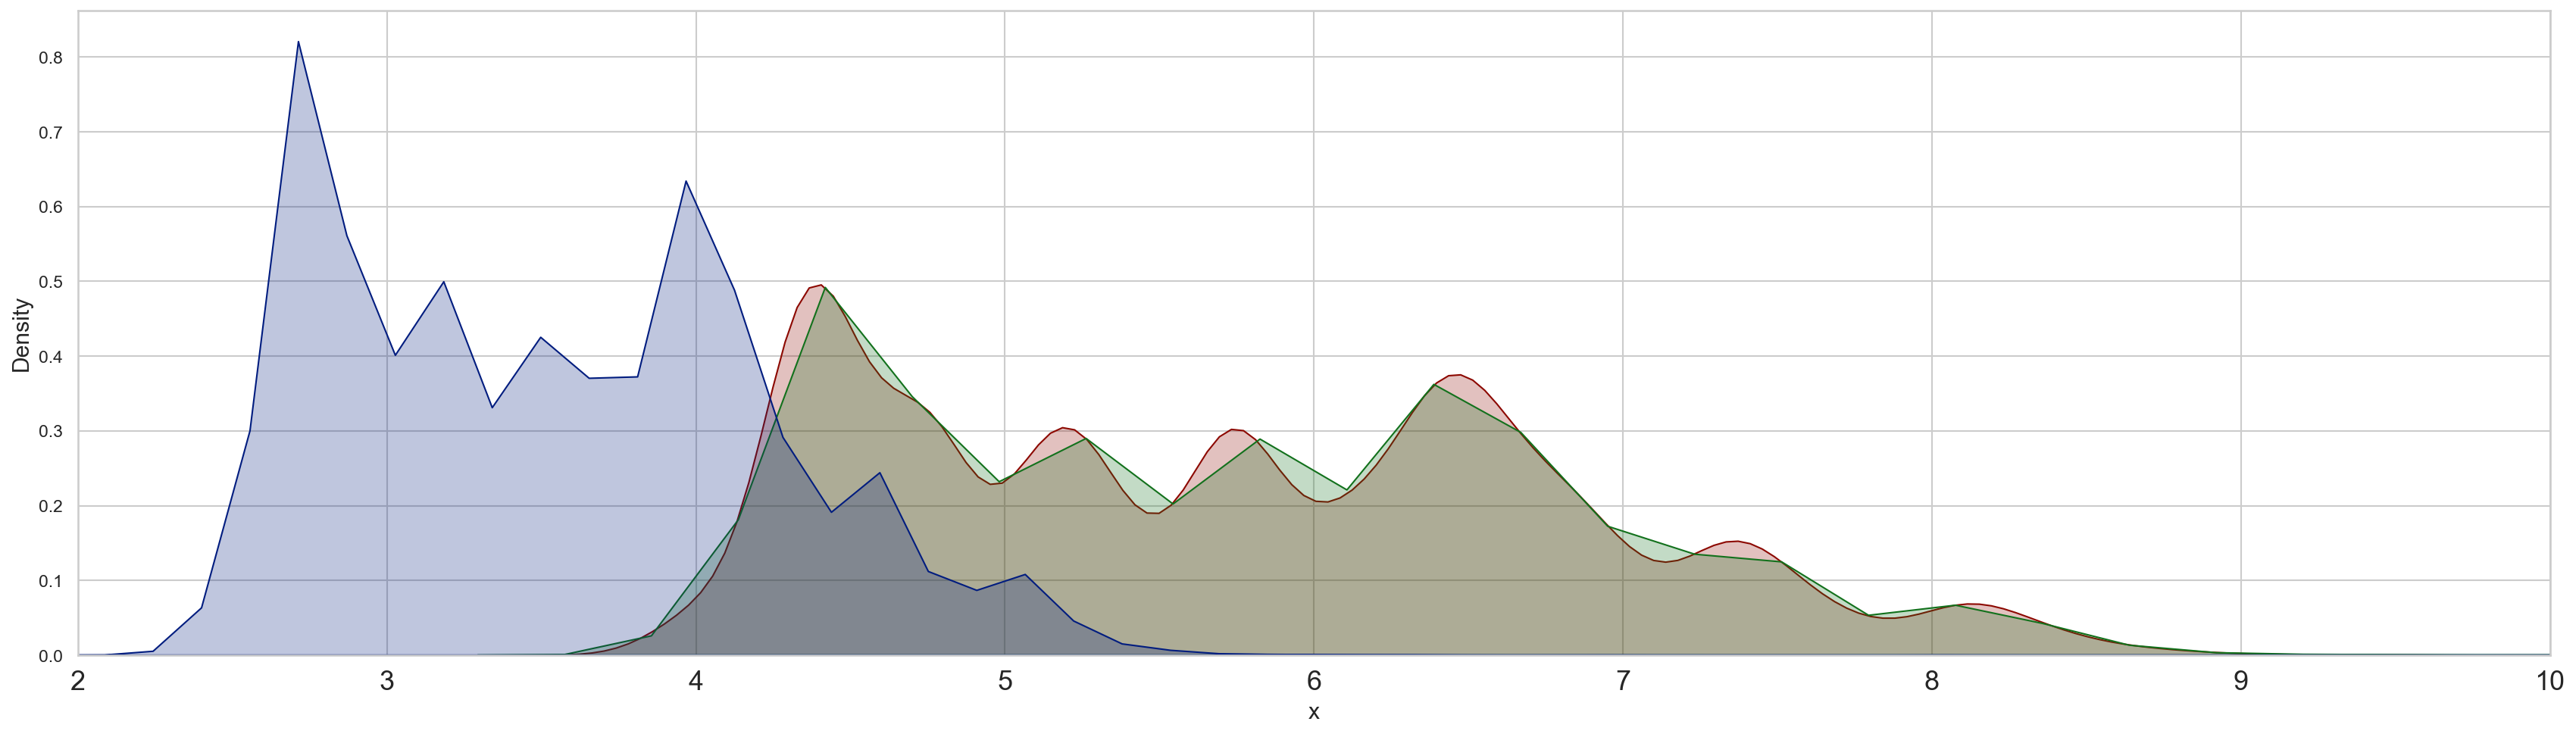

In [30]:
sns.kdeplot(df['x'] ,shade=True , color='r' )
sns.kdeplot(df['y'] , shade=True , color='g' )
sns.kdeplot(df['z'] , shade= True , color='b')
plt.xlim(2,10)

In [31]:
df['volume'] = df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


(0.0, 50000.0)

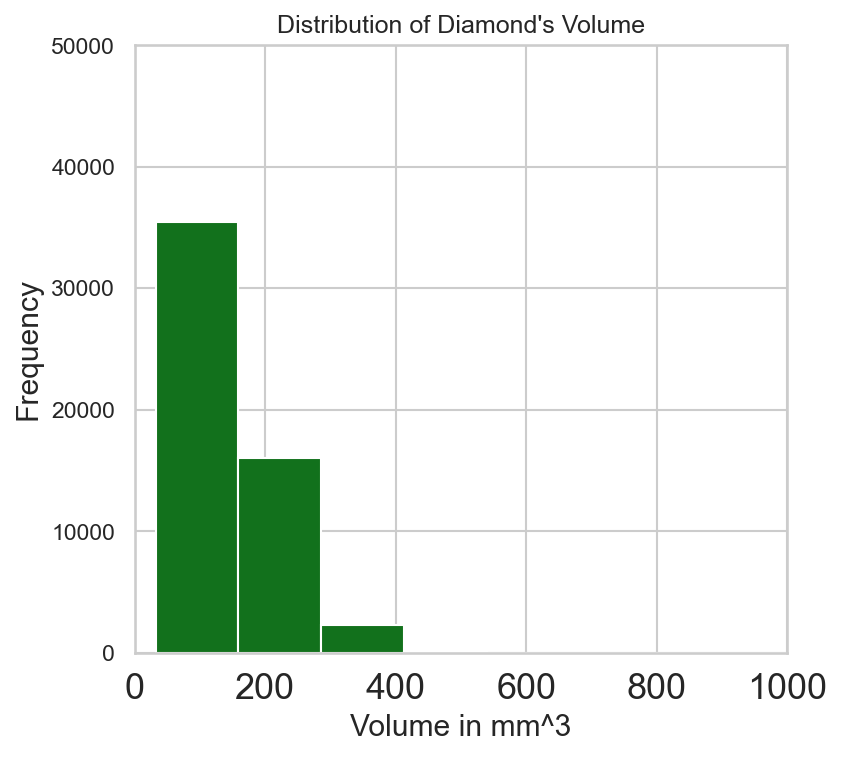

In [32]:
plt.figure(figsize=(5,5))
plt.hist( x=df['volume'] , bins=30 ,color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond\'s Volume')
plt.xlim(0,1000)
plt.ylim(0,50000)

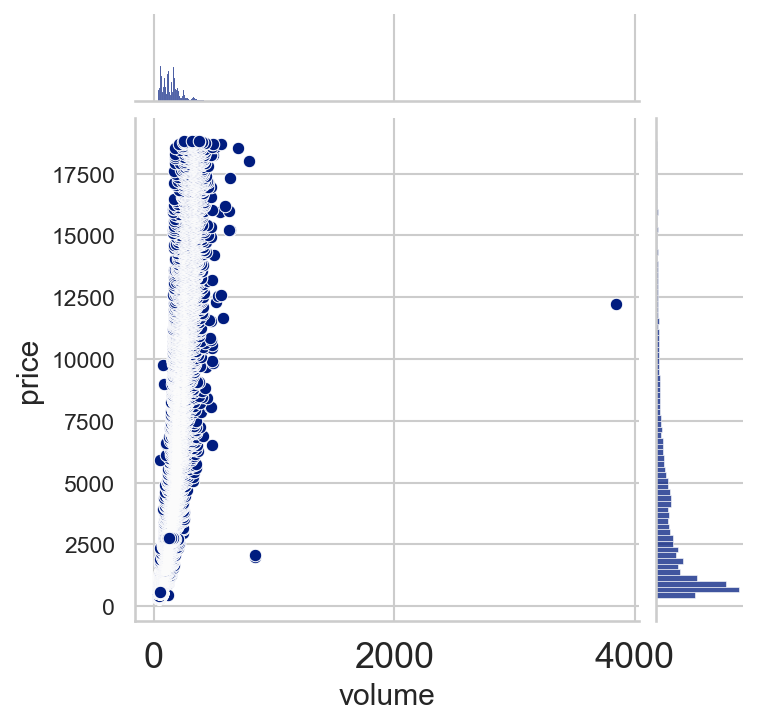

In [33]:
sns.jointplot(x='volume', y='price' , data=df, size=5)

# Synopsis: Their is a Linear Relationship between price and Volume 

In [34]:
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])


# Scaling

Divide the Dataset into Train and Test, So that we can fit the Train for Modelling Algos and Predict on Test.
Then Apply Feature Scaling although it's not neccessary in this case. But it surely helps.

In [35]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modeling Algos

In [37]:
# Collect all R2 Scores.
R2_Scores = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression',
          'RandomForest Regression' ,
         'KNeighbours Regression']


In [38]:
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


####### Linear Regression #######
Score : 0.8873
[0.80509012 0.88905527 0.88323669 0.87880479 0.88969679]

MSE    : 1816069.74 
MAE    : 852.28 
RMSE   : 1347.62 
R2     : 0.89 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


# Lasso Regression

In [39]:
#Apply Least Absolute Shrinkage and selection Operator
clf_la = Lasso()
clf_la.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_la, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_la.predict(X_test)
print('')
print('###### Lasso Regression ######')
print('Score : %.4f' % clf_la.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Lasso Regression ######
Score : 0.8873
[0.81738934 0.88901736 0.88318543 0.87893896 0.88911581]

MSE    : 1816772.45 
MAE    : 853.29 
RMSE   : 1347.88 
R2     : 0.89 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


# AdaBoost Regression

In [40]:
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_ar, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_ar.predict(X_test)
print('')
print('###### AdaBoost Regression ######')
print('Score : %.4f' % clf_ar.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### AdaBoost Regression ######
Score : 0.8621
[0.83745405 0.87119005 0.83701982 0.86639065 0.88175787]

MSE    : 2223156.52 
MAE    : 1233.11 
RMSE   : 1491.03 
R2     : 0.86 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.9s finished


# Ridge Regression

In [41]:
clf_rr = Ridge()
clf_rr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rr.predict(X_test)
print('')
print('###### Ridge Regression ######')
print('Score : %.4f' % clf_rr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


###### Ridge Regression ######
Score : 0.8873
[0.8056539  0.88905775 0.88318962 0.87882271 0.88978124]

MSE    : 1816021.07 
MAE    : 852.30 
RMSE   : 1347.60 
R2     : 0.89 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


# GradientBoosting Regression

In [42]:
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0,verbose = 1)
clf_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_gbr.predict(X_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % clf_gbr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


      Iter       Train Loss   Remaining Time 
         1    14009477.5296            3.22s
         2    12433575.2888            2.80s
         3    11109502.2916            2.50s
         4     9937776.7996            2.21s
         5     8966558.8687            2.04s
         6     8096005.0633            1.90s
         7     7373711.1444            1.82s
         8     6738065.9593            1.75s
         9     6180388.7336            1.68s
        10     5706212.9974            1.64s
        20     3178181.4434            1.32s
        30     2363612.4206            1.11s
        40     2070989.7932            0.94s
        50     1895018.3539            0.78s
        60     1762696.4212            0.62s
        70     1662105.1320            0.46s
        80     1583729.6048            0.31s
        90     1522697.9504            0.15s
       100     1474036.3001            0.00s
      Iter       Train Loss   Remaining Time 
         1    13994442.1962            1.17s
        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


        20     3183392.6845            0.97s
        30     2364789.1263            0.85s
        40     2070038.5779            0.73s
        50     1893512.8326            0.61s
        60     1759405.8650            0.49s
        70     1657895.1474            0.36s
        80     1579114.3983            0.24s
        90     1517599.5534            0.12s
       100     1469095.8854            0.00s
      Iter       Train Loss   Remaining Time 
         1    14044115.9884            1.16s
         2    12470215.8336            1.16s
         3    11127607.3872            1.17s
         4     9974183.4598            1.15s
         5     8989306.4316            1.14s
         6     8130636.9629            1.13s
         7     7403440.0232            1.12s
         8     6750959.0039            1.11s
         9     6210130.8568            1.10s
        10     5722977.8071            1.09s
        20     3191999.7916            0.96s
        30     2377662.8009            0.84s
        4

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.1s finished


In [131]:
#Random Forrest Regression
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   58.2s finished



###### Random Forest ######
Score : 0.9823
[0.97940964 0.98143812 0.9805348  0.97749769 0.98096003]

MSE    : 286101.84 
MAE    : 260.33 
RMSE   : 534.88 
R2     : 0.98 


In [63]:
#KNeighbors Regression
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished



###### KNeighbours Regression ######
Score : 0.9607
[0.95646988 0.96177178 0.95664104 0.95196565 0.95775796]

MSE    : 633049.42 
MAE    : 393.71 
RMSE   : 795.64 
R2     : 0.96 


In [64]:
#Tuning Parameters
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='r2')
clf_knn.fit(X_train,y_train)
print('Score : %.4f' % clf_knn.score(X_test, y_test))
pred=clf_knn.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.9607
R2     : 0.96 


In [65]:
#Visualizing R2 Scores
a = {'Algorithms' : models , 'R2-Scores': R2_Scores}
df = pd.DataFrame.from_dict(a, orient='index')
df = df.transpose()
print (df.transpose)

<bound method DataFrame.transpose of                     Algorithms R2-Scores
0            Linear Regression  0.887345
1             Lasso Regression  0.887302
2          AdaBoost Regression  0.862093
3             Ridge Regression  0.887348
4  GradientBoosting Regression  0.908207
5      RandomForest Regression  0.960731
6       KNeighbours Regression  0.960731>


<AxesSubplot:xlabel='R2-Scores', ylabel='Algorithms'>

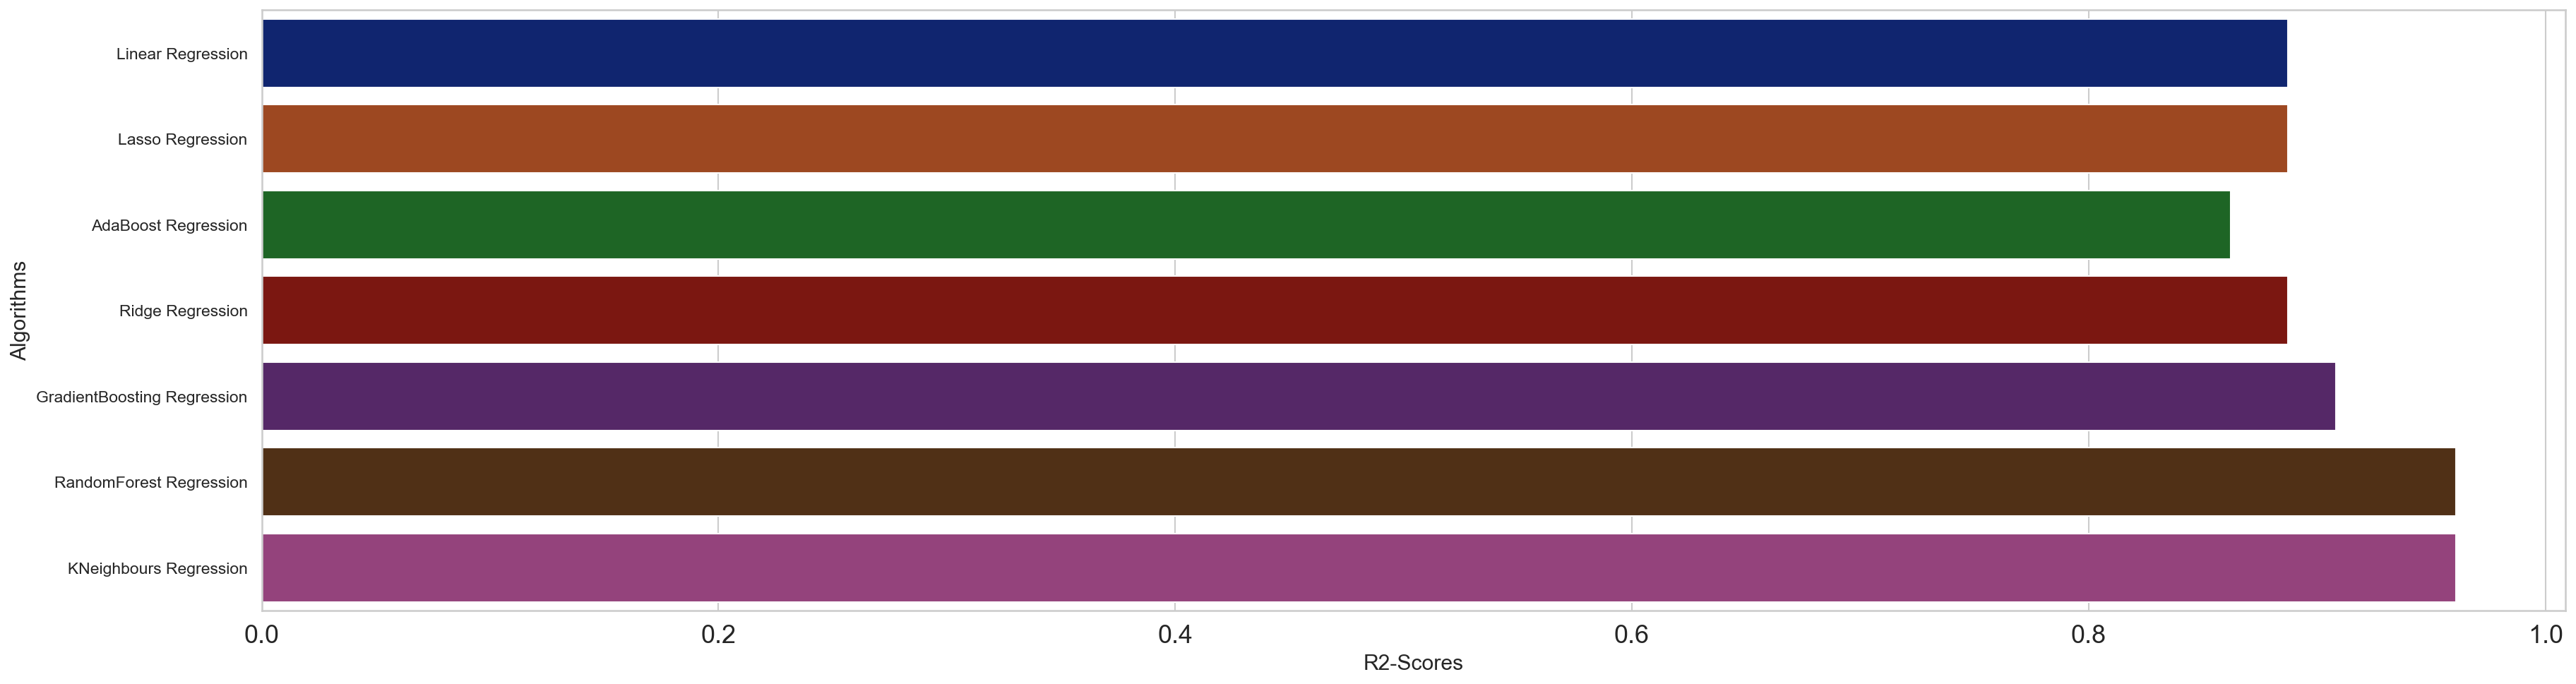

In [66]:
#compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
sns.barplot(x='R2-Scores' , y='Algorithms' , data=df)

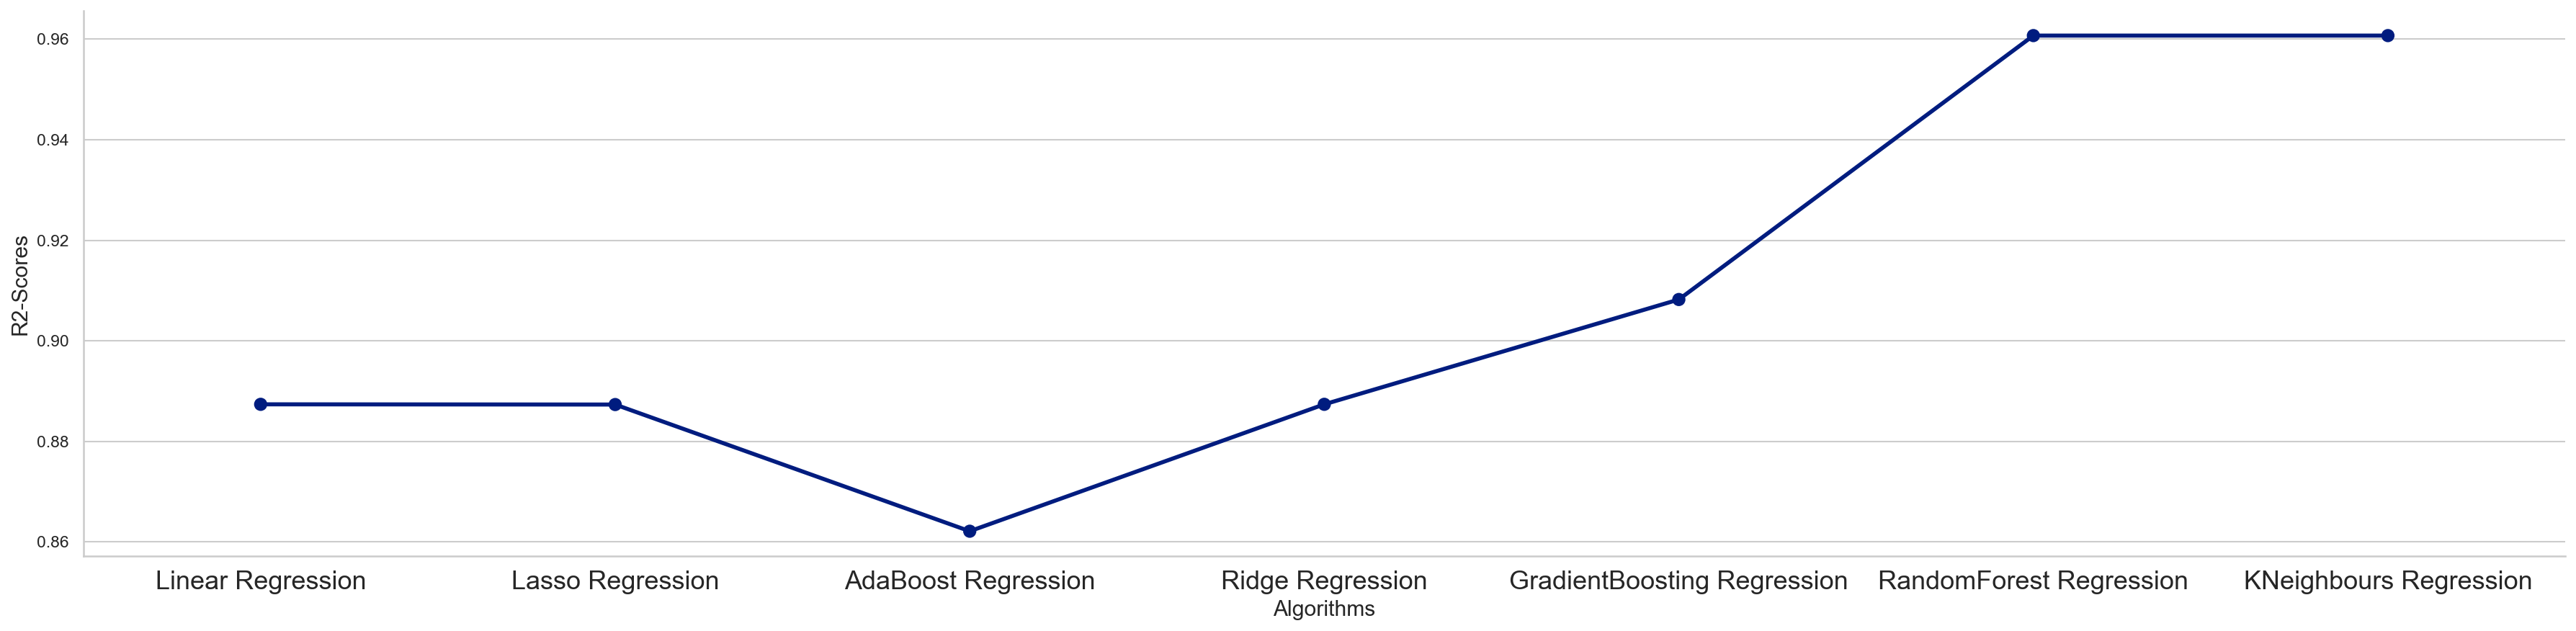

In [68]:
sns.factorplot(x='Algorithms', y='R2-Scores' , data=df, size=6 , aspect=4)
